In [1]:
!pip install scipy

In [2]:
!pip install plotly


In [3]:
conda install -c plotly plotly-orca

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install -U kaleido

In [5]:
#Now lets import the libraries
import pandas as pd
from datetime import datetime
import plotly.express as px
from plotly.subplots import make_subplots
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import poisson
import scipy.stats  as stats
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os
import plotly.graph_objects as go
from IPython.display import Image

### Generate weekly statistics (mean, median, mode) for number of new cases and deaths across a specific state.

In [6]:
#Now lets read the covid dataset
covid_data=pd.read_csv("C:/Users/Vidya/Desktop/Data_Science_project/Fall-21_COVID-Team_5/data/Stage_1/covid_large.csv")

In [7]:
#Now lets change the format
covid_data['Date'] = covid_data.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

In [8]:
#lets choose the state
FL_state=covid_data[covid_data['State']=='FL']

In [9]:
FL_state

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population
187944,0,Statewide Unallocated,FL,12,2020-01-22,0,0,0
187945,0,Statewide Unallocated,FL,12,2020-01-23,0,0,0
187946,0,Statewide Unallocated,FL,12,2020-01-24,0,0,0
187947,0,Statewide Unallocated,FL,12,2020-01-25,0,0,0
187948,0,Statewide Unallocated,FL,12,2020-01-26,0,0,0
...,...,...,...,...,...,...,...,...
226903,12133,Washington County,FL,12,2021-08-12,3193,52,25473
226904,12133,Washington County,FL,12,2021-08-13,3380,52,25473
226905,12133,Washington County,FL,12,2021-08-14,3380,52,25473
226906,12133,Washington County,FL,12,2021-08-15,3380,52,25473


In [10]:
FL_state['Num of Cases Per Day'] = FL_state['Cases'].diff()
FL_state['Num of Deaths Per Day'] = FL_state['Death'].diff()



#state.drop(['Num of Cases','Num of Deaths'], axis=1, inplace=True)

In [11]:
num = FL_state['Num of Cases Per Day']._get_numeric_data()
num[num < 0] = 0
num1 = FL_state['Num of Deaths Per Day']._get_numeric_data()
num1[num1 < 0] = 0

In [12]:
FL_state

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population,Num of Cases Per Day,Num of Deaths Per Day
187944,0,Statewide Unallocated,FL,12,2020-01-22,0,0,0,NaN,NaN
187945,0,Statewide Unallocated,FL,12,2020-01-23,0,0,0,0.0,0.0
187946,0,Statewide Unallocated,FL,12,2020-01-24,0,0,0,0.0,0.0
187947,0,Statewide Unallocated,FL,12,2020-01-25,0,0,0,0.0,0.0
187948,0,Statewide Unallocated,FL,12,2020-01-26,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
226903,12133,Washington County,FL,12,2021-08-12,3193,52,25473,0.0,0.0
226904,12133,Washington County,FL,12,2021-08-13,3380,52,25473,187.0,0.0
226905,12133,Washington County,FL,12,2021-08-14,3380,52,25473,0.0,0.0
226906,12133,Washington County,FL,12,2021-08-15,3380,52,25473,0.0,0.0


In [13]:
##Removing first date as there are 0 cases on 22nd Jan and the first is NaN
FL_state = FL_state[FL_state['Date'] != '2020-01-22']
FL_state
#Removing the number of cases and deaths columns as we have new cases and deaths
FL_state.drop(['Cases','Death'], axis=1, inplace=True)

In [14]:
FL_state

,countyFIPS,County Name,State,StateFIPS,Date,Population,Num of Cases Per Day,Num of Deaths Per Day
187945,0,Statewide Unallocated,FL,12,2020-01-23,0,0.0,0.0
187946,0,Statewide Unallocated,FL,12,2020-01-24,0,0.0,0.0
187947,0,Statewide Unallocated,FL,12,2020-01-25,0,0.0,0.0
187948,0,Statewide Unallocated,FL,12,2020-01-26,0,0.0,0.0
187949,0,Statewide Unallocated,FL,12,2020-01-27,0,0.0,0.0
...,...,...,...,...,...,...,...,...
226903,12133,Washington County,FL,12,2021-08-12,25473,0.0,0.0
226904,12133,Washington County,FL,12,2021-08-13,25473,187.0,0.0
226905,12133,Washington County,FL,12,2021-08-14,25473,0.0,0.0
226906,12133,Washington County,FL,12,2021-08-15,25473,0.0,0.0


In [15]:
#Groupby Date
f={'Num of Cases Per Day':'sum','Num of Deaths Per Day':'sum','Population':'sum','State':'first'}
FL_state_date = FL_state.groupby("Date").agg(f).reset_index()
FL_state_date

,Date,Num of Cases Per Day,Num of Deaths Per Day,Population,State
0,2020-01-23,0.0,0.0,21477737,FL
1,2020-01-24,0.0,0.0,21477737,FL
2,2020-01-25,0.0,0.0,21477737,FL
3,2020-01-26,0.0,0.0,21477737,FL
4,2020-01-27,0.0,0.0,21477737,FL
...,...,...,...,...,...
567,2021-08-12,23933.0,29.0,21477737,FL
568,2021-08-13,151765.0,27.0,21477737,FL
569,2021-08-14,0.0,0.0,21477737,FL
570,2021-08-15,0.0,0.0,21477737,FL


In [16]:
#Normalizing the population 
FL_state_date['Num of Cases Per Day Normalized']= (FL_state_date['Num of Cases Per Day']/FL_state_date['Population'])*100000
FL_state_date['Num of Deaths Per Day Normalized']= (FL_state_date['Num of Deaths Per Day']/FL_state_date['Population'])*100000

FL_state_date

,Date,Num of Cases Per Day,Num of Deaths Per Day,Population,State,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
0,2020-01-23,0.0,0.0,21477737,FL,0.000000,0.000000
1,2020-01-24,0.0,0.0,21477737,FL,0.000000,0.000000
2,2020-01-25,0.0,0.0,21477737,FL,0.000000,0.000000
3,2020-01-26,0.0,0.0,21477737,FL,0.000000,0.000000
4,2020-01-27,0.0,0.0,21477737,FL,0.000000,0.000000
...,...,...,...,...,...,...,...
567,2021-08-12,23933.0,29.0,21477737,FL,111.431665,0.135024
568,2021-08-13,151765.0,27.0,21477737,FL,706.615413,0.125712
569,2021-08-14,0.0,0.0,21477737,FL,0.000000,0.000000
570,2021-08-15,0.0,0.0,21477737,FL,0.000000,0.000000


In [17]:
#Mean of the cases and deaths
FL_state_data = FL_state_date.groupby([ pd.Grouper(key='Date', freq='w')])['Num of Cases Per Day Normalized','Num of Deaths Per Day Normalized'].agg({'Num of Cases Per Day Normalized':'mean',
                                                                                                'Num of Deaths Per Day Normalized' :'mean'}).round().reset_index()
FL_state_data

,Date,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
0,2020-01-26,0.0,0.0
1,2020-02-02,0.0,0.0
2,2020-02-09,0.0,0.0
3,2020-02-16,0.0,0.0
4,2020-02-23,0.0,0.0
...,...,...,...
78,2021-07-25,15.0,0.0
79,2021-08-01,136.0,0.0
80,2021-08-08,176.0,1.0
81,2021-08-15,147.0,0.0


In [18]:
#Now we are finding the mean and median for number of cases for the state we selected
FL_state_data["Num of Cases Per Day Normalized"].agg(["mean","median"])

mean      26.144578
median    18.000000
Name: Num of Cases Per Day Normalized, dtype: float64

In [19]:
#for number of deaths
FL_state_data["Num of Deaths Per Day Normalized"].agg(["mean","median"])

mean      0.216867
median    0.000000
Name: Num of Deaths Per Day Normalized, dtype: float64

In [20]:
#lets find mode
FL_state_data["Num of Cases Per Day Normalized"].mode()
#FL_state_data["Num of Deaths Per Day Normalized"].mode()

0    0.0
dtype: float64

In [21]:
FL_state_data["Num of Deaths Per Day Normalized"].mode()

0    0.0
dtype: float64

So, we can see that the median, median and mode are different for both Number of cases and Number of deaths so they both are not normal distribution.


In the number of cases we can see Mean>Median and Mean>mode so the weekly data is skewed.


In the number of deaths we can see that Mean>Median and Mean>mode so the weekly data is skewed.


### Compare the data against other states. (normalize by population).

In [22]:
#Lets group the states based on population
population_group = covid_data.groupby(['State',"Date"]).sum().reset_index()

In [23]:
population_group.groupby(['State','Population']).size().reset_index().rename(columns={0:'count'}).sort_values('Population')

,State,Population,count
50,WY,578759,573
46,VT,623989,573
7,DC,705749,573
0,AK,731545,573
28,ND,762062,573
41,SD,884659,573
8,DE,973764,573
39,RI,1059361,573
26,MT,1068778,573
21,ME,1344212,573


In [24]:
#Choosing 5 states along with Florida
states_5 = covid_data[covid_data["State"].isin(["FL","TX","CA","NC","NY","IL"])]

In [25]:
#Getting New cases and new deaths per day columns
states_5['Num of Cases Per Day'] = states_5['Cases'].diff()
states_5['Num of Deaths Per Day'] = states_5['Death'].diff()

In [26]:
num = states_5['Num of Cases Per Day']._get_numeric_data()
num[num < 0] = 0
num1 = states_5['Num of Deaths Per Day']._get_numeric_data()
num1[num1 < 0] = 0

In [27]:
states_5 = states_5[states_5['Date'] != '2020-01-22']
states_5

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population,Num of Cases Per Day,Num of Deaths Per Day
108871,0,Statewide Unallocated,CA,6,2020-01-23,0,0,0,0.0,0.0
108872,0,Statewide Unallocated,CA,6,2020-01-24,0,0,0,0.0,0.0
108873,0,Statewide Unallocated,CA,6,2020-01-25,0,0,0,0.0,0.0
108874,0,Statewide Unallocated,CA,6,2020-01-26,0,0,0,0.0,0.0
108875,0,Statewide Unallocated,CA,6,2020-01-27,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1616428,48507,Zavala County,TX,48,2021-08-12,2010,43,11840,0.0,0.0
1616429,48507,Zavala County,TX,48,2021-08-13,2025,43,11840,15.0,0.0
1616430,48507,Zavala County,TX,48,2021-08-14,2041,43,11840,16.0,0.0
1616431,48507,Zavala County,TX,48,2021-08-15,2041,43,11840,0.0,0.0


In [28]:
states_5.drop(['Cases','Death'], axis=1, inplace=True)
states_5

,countyFIPS,County Name,State,StateFIPS,Date,Population,Num of Cases Per Day,Num of Deaths Per Day
108871,0,Statewide Unallocated,CA,6,2020-01-23,0,0.0,0.0
108872,0,Statewide Unallocated,CA,6,2020-01-24,0,0.0,0.0
108873,0,Statewide Unallocated,CA,6,2020-01-25,0,0.0,0.0
108874,0,Statewide Unallocated,CA,6,2020-01-26,0,0.0,0.0
108875,0,Statewide Unallocated,CA,6,2020-01-27,0,0.0,0.0
...,...,...,...,...,...,...,...,...
1616428,48507,Zavala County,TX,48,2021-08-12,11840,0.0,0.0
1616429,48507,Zavala County,TX,48,2021-08-13,11840,15.0,0.0
1616430,48507,Zavala County,TX,48,2021-08-14,11840,16.0,0.0
1616431,48507,Zavala County,TX,48,2021-08-15,11840,0.0,0.0


In [29]:
#Groupby Date
f={'Num of Cases Per Day':'sum','Num of Deaths Per Day':'sum','Population':'sum'}
states_5 = states_5.groupby(["State","Date"]).agg(f).reset_index()
states_5

,State,Date,Num of Cases Per Day,Num of Deaths Per Day,Population
0,CA,2020-01-23,0.0,0.0,39512223
1,CA,2020-01-24,0.0,0.0,39512223
2,CA,2020-01-25,0.0,0.0,39512223
3,CA,2020-01-26,2.0,0.0,39512223
4,CA,2020-01-27,1.0,0.0,39512223
...,...,...,...,...,...
3427,TX,2021-08-12,15206.0,122.0,28995881
3428,TX,2021-08-13,13728.0,144.0,28995881
3429,TX,2021-08-14,26630.0,118.0,28995881
3430,TX,2021-08-15,5173.0,45.0,28995881


In [30]:
#Normalizing the Population
states_5['Num of Cases Per Day Normalized']= (states_5['Num of Cases Per Day']/states_5['Population'])*1000000
states_5['Num of Deaths Per Day Normalized']= (states_5['Num of Deaths Per Day']/states_5['Population'])*1000000

states_5

,State,Date,Num of Cases Per Day,Num of Deaths Per Day,Population,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
0,CA,2020-01-23,0.0,0.0,39512223,0.000000,0.000000
1,CA,2020-01-24,0.0,0.0,39512223,0.000000,0.000000
2,CA,2020-01-25,0.0,0.0,39512223,0.000000,0.000000
3,CA,2020-01-26,2.0,0.0,39512223,0.050617,0.000000
4,CA,2020-01-27,1.0,0.0,39512223,0.025309,0.000000
...,...,...,...,...,...,...,...
3427,TX,2021-08-12,15206.0,122.0,28995881,524.419313,4.207494
3428,TX,2021-08-13,13728.0,144.0,28995881,473.446556,4.966223
3429,TX,2021-08-14,26630.0,118.0,28995881,918.406307,4.069544
3430,TX,2021-08-15,5173.0,45.0,28995881,178.404650,1.551945


In [31]:
#Grouping by week and finding the mean.
Mean_states_5 = states_5.groupby(["State", pd.Grouper(key='Date', freq='w')])['Num of Cases Per Day Normalized','Num of Deaths Per Day Normalized'].agg({'Num of Cases Per Day Normalized':'mean',
                                                                                                'Num of Deaths Per Day Normalized' :'mean',}).round().reset_index()
Mean_states_5


,State,Date,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
0,CA,2020-01-26,0.0,0.0
1,CA,2020-02-02,0.0,0.0
2,CA,2020-02-09,0.0,0.0
3,CA,2020-02-16,0.0,0.0
4,CA,2020-02-23,0.0,0.0
...,...,...,...,...
493,TX,2021-07-25,177.0,1.0
494,TX,2021-08-01,311.0,1.0
495,TX,2021-08-08,478.0,2.0
496,TX,2021-08-15,487.0,3.0


In [32]:
#Getting mean and median of cases of all 5 states
Mean_states_5.groupby('State')['Num of Cases Per Day Normalized'].agg(['mean','median']).round().reset_index()


,State,mean,median
0,CA,188.0,83.0
1,FL,262.0,181.0
2,IL,207.0,139.0
3,NC,204.0,146.0
4,NY,196.0,94.0
5,TX,229.0,144.0


In [33]:
#Getting mode of cases of all 5 states
Mean_states_5.groupby('State')['Num of Cases Per Day Normalized'].agg(lambda x:x.value_counts().index[0]).reset_index()


,State,Num of Cases Per Day Normalized
0,CA,0.0
1,FL,0.0
2,IL,0.0
3,NC,0.0
4,NY,0.0
5,TX,0.0


##### From above statistics:

- We can see that all the states weekly mean cases are positively skewed.
- Population of Califonia is higher than Florida and Texas but its weekly mean is less compared to those two states.
- North Carolina has low population than Illinois but the mean of NC similar to IL so we can say NC is more contagious compared  to IL.
- For the 2nd and 3rd most populated states in US, FL and TX they do have similar stats, Florida has a higher weekly mean of      cases that means it has higher cases than Texas in total.
- Compared to all Califonia with the hightest population have less mean value than all other states.


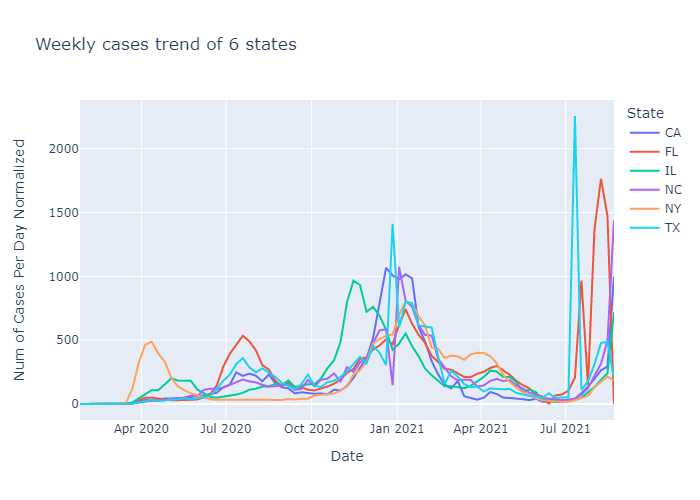

In [85]:
fig1_all_fl = px.line(Mean_states_5, x="Date", y="Num of Cases Per Day Normalized", color='State', title="Weekly cases trend of 6 states")
#fig1_all_fl.show()
#fig_all_tx.set_ylabel("Num of Cases Per Day Normalized")
#plt.show


fig1_all_fl.write_image("C:/Users/Vidya/Desktop/Data_Science_project/Fall-21_COVID-Team_5/Images/Saved Pictures/fig1_all_fl.png")
img_bytes = fig1_all_fl.to_image(format="png")
Image(img_bytes)

In [35]:
Mean_states_5.groupby('State')['Num of Deaths Per Day Normalized'].agg(['mean','median']).round().reset_index()

,State,mean,median
0,CA,3.0,2.0
1,FL,3.0,3.0
2,IL,4.0,2.0
3,NC,2.0,2.0
4,NY,5.0,2.0
5,TX,3.0,2.0


In [36]:
Mean_states_5.groupby('State')['Num of Deaths Per Day Normalized'].agg(pd.Series.mode).reset_index()

,State,Num of Deaths Per Day Normalized
0,CA,2.0
1,FL,2.0
2,IL,2.0
3,NC,2.0
4,NY,1.0
5,TX,1.0


#### From the above Statistics:

- NC state weekly death mean= median=mode, so we can say it is a normal distribution.
- CA is highly populated than all the other states, but the weekly death mean of IL, NY are higher than CA, which infers that the death rate of the other states were higher.
- MS is highly affected, since the population is 10 times lower than TX but the weekly death mean is high.
- NC has less population than CA and lower weekly death mean
- NY has high population and also higher weekly death mean.
- All the other states weekly data except NC are skewed.

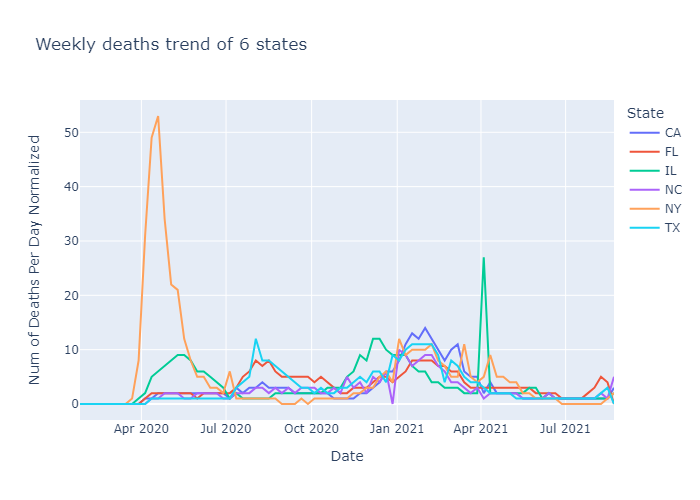

In [86]:
fig2_all_fl = px.line(Mean_states_5, x="Date", y="Num of Deaths Per Day Normalized", color='State', title="Weekly deaths trend of 6 states")
#fig2_all_fl.show()
fig2_all_fl.write_image("C:/Users/Vidya/Desktop/Data_Science_project/Fall-21_COVID-Team_5/Images/Saved Pictures/fig2_all_fl.png")
img_bytes = fig2_all_fl.to_image(format="png")
Image(img_bytes)

### Identify counties within the previous state with high case and death rates. (normalize by population)

In [87]:
FL_state

,State,Date,Population,Num of Cases Per Day,Num of Deaths Per Day Normalized,Num of Cases Per Day Normalized,Num of Deaths Per Day
0,FL,2020-01-23,21477737,0.0,0.0,0.0,0.0
1,FL,2020-01-24,21477737,0.0,0.0,0.0,0.0
2,FL,2020-01-25,21477737,0.0,0.0,0.0,0.0
3,FL,2020-01-26,21477737,0.0,0.0,0.0,0.0
4,FL,2020-01-27,21477737,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
567,FL,2021-08-12,21477737,23933.0,NaN,NaN,29.0
568,FL,2021-08-13,21477737,151765.0,NaN,5004.0,27.0
569,FL,2021-08-14,21477737,0.0,0.0,0.0,0.0
570,FL,2021-08-15,21477737,0.0,0.0,0.0,0.0


In [39]:
f={'countyFIPS':'first','Population':'first','Num of Cases Per Day':'sum','Num of Deaths Per Day':'sum'}
FL_state_county=FL_state.groupby('County Name').agg(f).reset_index()
FL_state_county

,County Name,countyFIPS,Population,Num of Cases Per Day,Num of Deaths Per Day
0,Alachua County,12001,269043,31046.0,286.0
1,Baker County,12003,29210,4867.0,65.0
2,Bay County,12005,174705,27106.0,397.0
3,Bradford County,12007,28201,4112.0,59.0
4,Brevard County,12009,601942,60183.0,919.0
...,...,...,...,...,...
63,Union County,12125,15237,2519.0,75.0
64,Volusia County,12127,553284,60275.0,851.0
65,Wakulla County,12129,33739,4591.0,58.0
66,Walton County,12131,74071,9638.0,92.0


In [40]:
FL_state_county = FL_state_county[FL_state_county['County Name'] != "statewide unallocated"]

In [41]:
FL_state_county['cases_rate'] = (FL_state_county['Num of Cases Per Day']/FL_state_county['Population'])*10000
FL_state_county['deaths_rate'] = (FL_state_county['Num of Deaths Per Day']/FL_state_county['Population'])*10000
FL_state_county

,County Name,countyFIPS,Population,Num of Cases Per Day,Num of Deaths Per Day,cases_rate,deaths_rate
0,Alachua County,12001,269043,31046.0,286.0,1153.941935,10.630271
1,Baker County,12003,29210,4867.0,65.0,1666.210202,22.252653
2,Bay County,12005,174705,27106.0,397.0,1551.529722,22.724020
3,Bradford County,12007,28201,4112.0,59.0,1458.104323,20.921244
4,Brevard County,12009,601942,60183.0,919.0,999.813936,15.267252
...,...,...,...,...,...,...,...
63,Union County,12125,15237,2519.0,75.0,1653.212575,49.222288
64,Volusia County,12127,553284,60275.0,851.0,1089.404357,15.380889
65,Wakulla County,12129,33739,4591.0,58.0,1360.739797,17.190788
66,Walton County,12131,74071,9638.0,92.0,1301.183999,12.420515


In [42]:
#top 5 counties with high case rates
FL_high_case=FL_state_county.sort_values(['cases_rate'],ascending=False).head()
FL_high_case.head()

,County Name,countyFIPS,Population,Num of Cases Per Day,Num of Deaths Per Day,cases_rate,deaths_rate
59,Statewide Unallocated,0,0,358902.0,3657.0,inf,inf
32,Lafayette County,12067,8422,1858.0,29.0,2206.126811,34.433626
42,Miami-Dade County,12086,2716940,588045.0,6478.0,2164.365058,23.843000
21,Gulf County,12045,13639,2547.0,47.0,1867.438962,34.460004
37,Liberty County,12077,8354,1447.0,17.0,1732.104381,20.349533


In [43]:
#top 5 counties with high death rates
FL_high_death=FL_state_county.sort_values(['deaths_rate'],ascending=False).head()
FL_high_death.head()

,County Name,countyFIPS,Population,Num of Cases Per Day,Num of Deaths Per Day,cases_rate,deaths_rate
59,Statewide Unallocated,0,0,358902.0,3657.0,inf,inf
63,Union County,12125,15237,2519.0,75.0,1653.212575,49.222288
6,Calhoun County,12013,14105,2312.0,53.0,1639.135058,37.575328
30,Jackson County,12063,46414,8034.0,164.0,1730.943250,35.334166
26,Highlands County,12055,106221,10721.0,372.0,1009.310777,35.021323


### Plot daily trends (new cases and deaths) of state and top 5 infected counties. Utilize aggregrate, normalized by population, and log normalized values.

In [44]:
FL_state_date


,Date,Num of Cases Per Day,Num of Deaths Per Day,Population,State,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
0,2020-01-23,0.0,0.0,21477737,FL,0.000000,0.000000
1,2020-01-24,0.0,0.0,21477737,FL,0.000000,0.000000
2,2020-01-25,0.0,0.0,21477737,FL,0.000000,0.000000
3,2020-01-26,0.0,0.0,21477737,FL,0.000000,0.000000
4,2020-01-27,0.0,0.0,21477737,FL,0.000000,0.000000
...,...,...,...,...,...,...,...
567,2021-08-12,23933.0,29.0,21477737,FL,111.431665,0.135024
568,2021-08-13,151765.0,27.0,21477737,FL,706.615413,0.125712
569,2021-08-14,0.0,0.0,21477737,FL,0.000000,0.000000
570,2021-08-15,0.0,0.0,21477737,FL,0.000000,0.000000


In [45]:
FL_state_date['State']='FL'

In [46]:
states_5

,State,Date,Num of Cases Per Day,Num of Deaths Per Day,Population,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
0,CA,2020-01-23,0.0,0.0,39512223,0.000000,0.000000
1,CA,2020-01-24,0.0,0.0,39512223,0.000000,0.000000
2,CA,2020-01-25,0.0,0.0,39512223,0.000000,0.000000
3,CA,2020-01-26,2.0,0.0,39512223,0.050617,0.000000
4,CA,2020-01-27,1.0,0.0,39512223,0.025309,0.000000
...,...,...,...,...,...,...,...
3427,TX,2021-08-12,15206.0,122.0,28995881,524.419313,4.207494
3428,TX,2021-08-13,13728.0,144.0,28995881,473.446556,4.966223
3429,TX,2021-08-14,26630.0,118.0,28995881,918.406307,4.069544
3430,TX,2021-08-15,5173.0,45.0,28995881,178.404650,1.551945


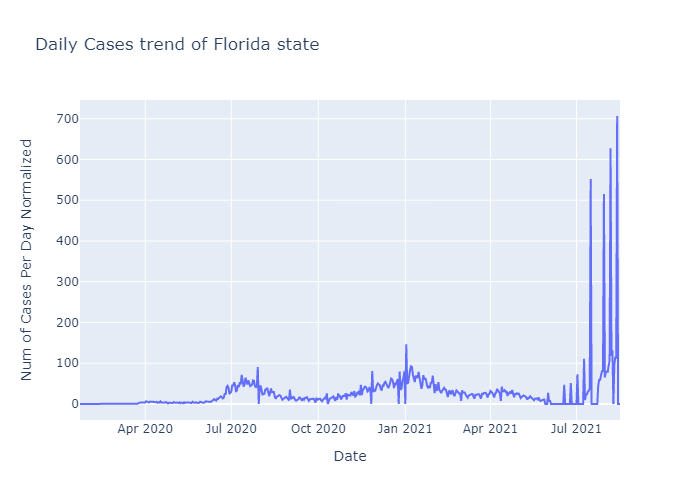

In [98]:
fig3_fl = px.line(FL_state_date, x="Date", y='Num of Cases Per Day Normalized',title='Daily Cases trend of Florida state')
#fig3_fl.show()
fig3_fl.write_image("C:/Users/Vidya/Desktop/Data_Science_project/Fall-21_COVID-Team_5/Images/Saved Pictures/fig3_fl.png")
img_bytes = fig3_fl.to_image(format="png")
Image(img_bytes)

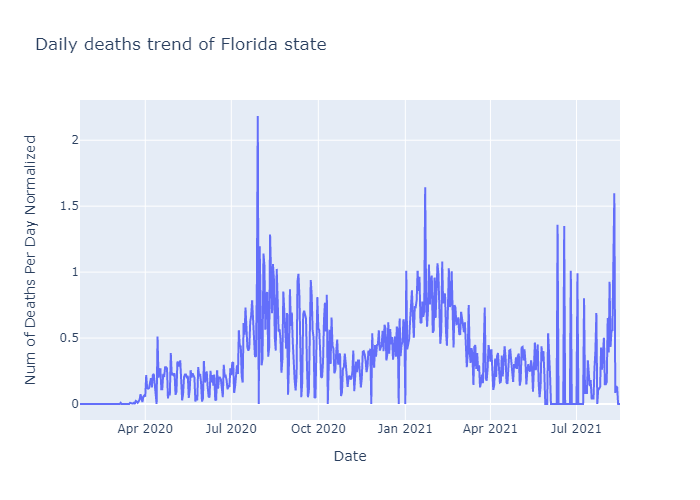

In [96]:
fig4_fl = px.line(FL_state_date, x="Date", y='Num of Deaths Per Day Normalized',title='Daily deaths trend of Florida state')
#fig4_fl.show()
fig4_fl.write_image("C:/Users/Vidya/Desktop/Data_Science_project/Fall-21_COVID-Team_5/Images/Saved Pictures/fig4_fl.png")
img_bytes = fig4_fl.to_image(format="png")
Image(img_bytes)

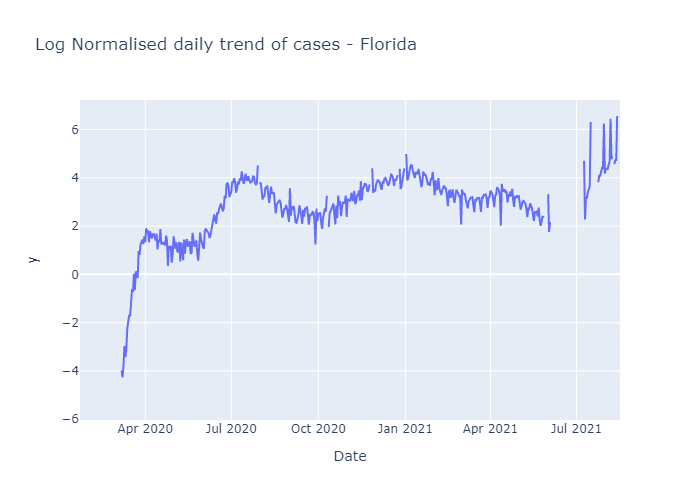

In [100]:
fig5_fl = px.line(FL_state_date, x="Date", y=np.log(FL_state_date['Num of Cases Per Day Normalized']),title='Log Normalised daily trend of cases - Florida' )
#fig5_fl.show()
fig1_all_fl.write_image("C:/Users/Vidya/Desktop/Data_Science_project/Fall-21_COVID-Team_5/Images/Saved Pictures/fig5_fl.png")
img_bytes = fig5_fl.to_image(format="png")
Image(img_bytes)

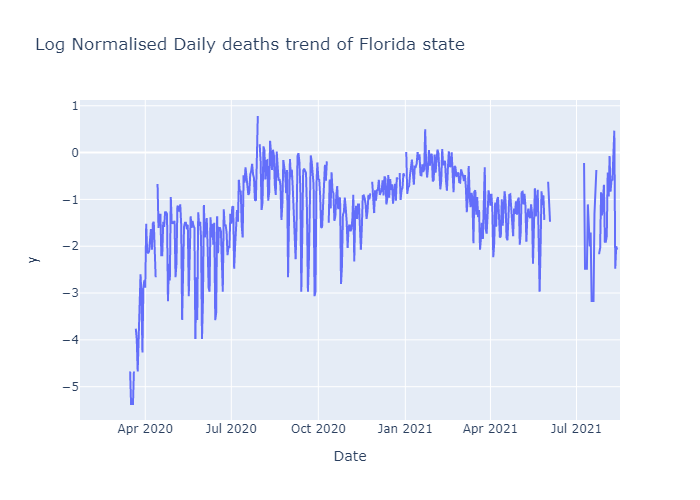

In [95]:
fig6_fl = px.line(FL_state_date, x="Date", y=np.log(FL_state_date['Num of Deaths Per Day Normalized']),title='Log Normalised Daily deaths trend of Florida state')
#fig6_fl.show()
fig6_fl.write_image("C:/Users/Vidya/Desktop/Data_Science_project/Fall-21_COVID-Team_5/Images/Saved Pictures/fig6_fl.png")
img_bytes = fig6_fl.to_image(format="png")
Image(img_bytes)

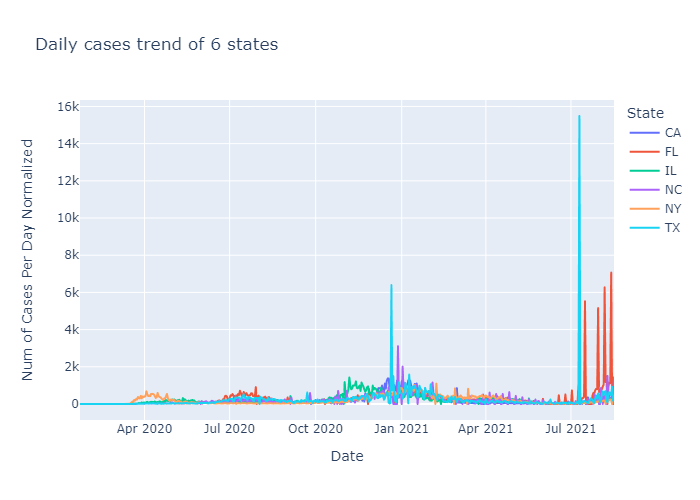

In [101]:
fig7_fl = px.line(states_5, x="Date", y="Num of Cases Per Day Normalized", color='State', title="Daily cases trend of 6 states")
#fig7_fl.show()
fig7_fl.write_image("C:/Users/Vidya/Desktop/Data_Science_project/Fall-21_COVID-Team_5/Images/Saved Pictures/fig7_fl.png")
img_bytes = fig7_fl.to_image(format="png")
Image(img_bytes)

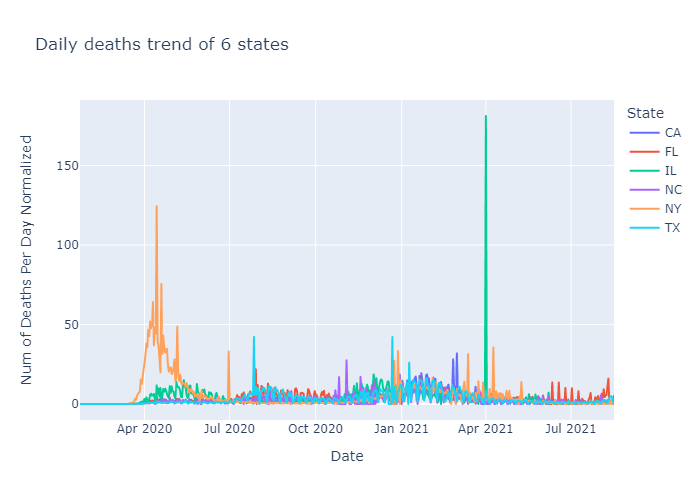

In [102]:
fig8_fl= px.line(states_5, x="Date", y="Num of Deaths Per Day Normalized", color='State', title="Daily deaths trend of 6 states")
#fig8_fl.show()
fig8_fl.write_image("C:/Users/Vidya/Desktop/Data_Science_project/Fall-21_COVID-Team_5/Images/Saved Pictures/fig8_fl.png")
img_bytes = fig8_fl.to_image(format="png")
Image(img_bytes)

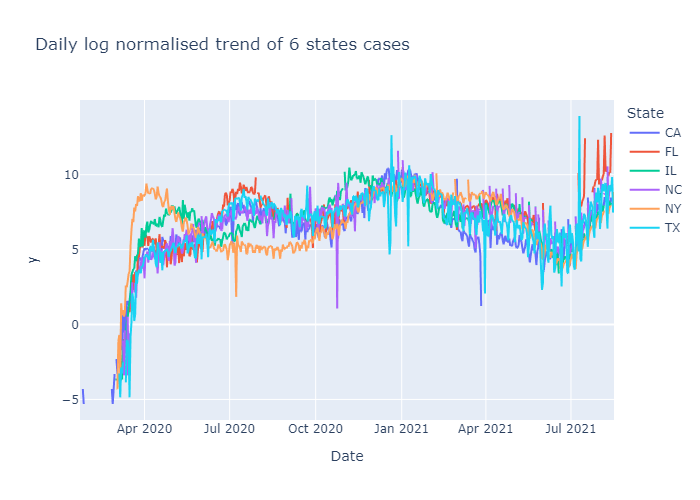

In [103]:
fig9_fl = px.line(states_5, x="Date", y=np.log2(states_5['Num of Cases Per Day Normalized']), color='State', title="Daily log normalised trend of 6 states cases")
#fig9_fl.show()
fig9_fl.write_image("C:/Users/Vidya/Desktop/Data_Science_project/Fall-21_COVID-Team_5/Images/Saved Pictures/fig9_fl.png")
img_bytes = fig9_fl.to_image(format="png")
Image(img_bytes)

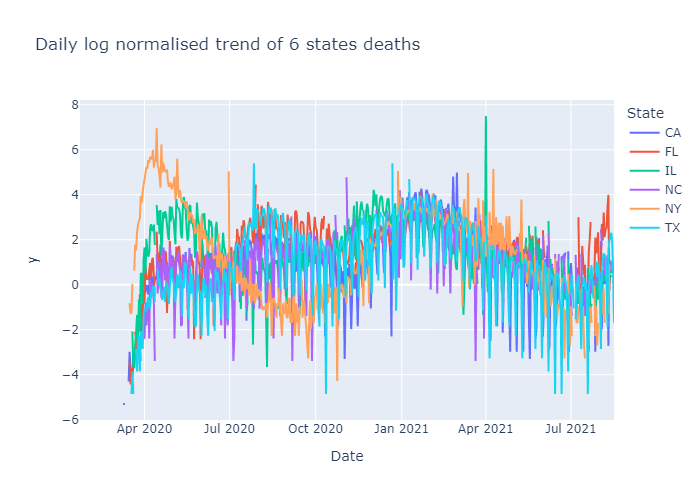

In [104]:
fig10_fl = px.line(states_5, x="Date", y=np.log2(states_5['Num of Deaths Per Day Normalized']), color='State', title="Daily log normalised trend of 6 states deaths")
#fig10_fl.show()
fig10_fl.write_image("C:/Users/Vidya/Desktop/Data_Science_project/Fall-21_COVID-Team_5/Images/Saved Pictures/fig10_fl.png")
img_bytes = fig10_fl.to_image(format="png")
Image(img_bytes)

In [55]:
#Now checking top 5 counties daily trends in florida state
FL_state_county

,County Name,countyFIPS,Population,Num of Cases Per Day,Num of Deaths Per Day,cases_rate,deaths_rate
0,Alachua County,12001,269043,31046.0,286.0,1153.941935,10.630271
1,Baker County,12003,29210,4867.0,65.0,1666.210202,22.252653
2,Bay County,12005,174705,27106.0,397.0,1551.529722,22.724020
3,Bradford County,12007,28201,4112.0,59.0,1458.104323,20.921244
4,Brevard County,12009,601942,60183.0,919.0,999.813936,15.267252
...,...,...,...,...,...,...,...
63,Union County,12125,15237,2519.0,75.0,1653.212575,49.222288
64,Volusia County,12127,553284,60275.0,851.0,1089.404357,15.380889
65,Wakulla County,12129,33739,4591.0,58.0,1360.739797,17.190788
66,Walton County,12131,74071,9638.0,92.0,1301.183999,12.420515


In [56]:
FL_state

,countyFIPS,County Name,State,StateFIPS,Date,Population,Num of Cases Per Day,Num of Deaths Per Day
187945,0,Statewide Unallocated,FL,12,2020-01-23,0,0.0,0.0
187946,0,Statewide Unallocated,FL,12,2020-01-24,0,0.0,0.0
187947,0,Statewide Unallocated,FL,12,2020-01-25,0,0.0,0.0
187948,0,Statewide Unallocated,FL,12,2020-01-26,0,0.0,0.0
187949,0,Statewide Unallocated,FL,12,2020-01-27,0,0.0,0.0
...,...,...,...,...,...,...,...,...
226903,12133,Washington County,FL,12,2021-08-12,25473,0.0,0.0
226904,12133,Washington County,FL,12,2021-08-13,25473,187.0,0.0
226905,12133,Washington County,FL,12,2021-08-14,25473,0.0,0.0
226906,12133,Washington County,FL,12,2021-08-15,25473,0.0,0.0


In [57]:
FL_state = FL_state[FL_state['County Name'] != "statewide unallocated"]

In [58]:
FL_state['Num of Cases Per Day Normalized'] = (FL_state['Num of Cases Per Day']/FL_state['Population'])*10000
FL_state['Num of Deaths Per Day Normalized']= (FL_state['Num of Deaths Per Day']/FL_state['Population'])*10000

In [59]:
FL_state

,countyFIPS,County Name,State,StateFIPS,Date,Population,Num of Cases Per Day,Num of Deaths Per Day,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
187945,0,Statewide Unallocated,FL,12,2020-01-23,0,0.0,0.0,NaN,NaN
187946,0,Statewide Unallocated,FL,12,2020-01-24,0,0.0,0.0,NaN,NaN
187947,0,Statewide Unallocated,FL,12,2020-01-25,0,0.0,0.0,NaN,NaN
187948,0,Statewide Unallocated,FL,12,2020-01-26,0,0.0,0.0,NaN,NaN
187949,0,Statewide Unallocated,FL,12,2020-01-27,0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
226903,12133,Washington County,FL,12,2021-08-12,25473,0.0,0.0,0.000000,0.0
226904,12133,Washington County,FL,12,2021-08-13,25473,187.0,0.0,73.411063,0.0
226905,12133,Washington County,FL,12,2021-08-14,25473,0.0,0.0,0.000000,0.0
226906,12133,Washington County,FL,12,2021-08-15,25473,0.0,0.0,0.000000,0.0


In [60]:
FL_high_case

,County Name,countyFIPS,Population,Num of Cases Per Day,Num of Deaths Per Day,cases_rate,deaths_rate
59,Statewide Unallocated,0,0,358902.0,3657.0,inf,inf
32,Lafayette County,12067,8422,1858.0,29.0,2206.126811,34.433626
42,Miami-Dade County,12086,2716940,588045.0,6478.0,2164.365058,23.843000
21,Gulf County,12045,13639,2547.0,47.0,1867.438962,34.460004
37,Liberty County,12077,8354,1447.0,17.0,1732.104381,20.349533


In [61]:
#Setting up the dataframe of high cases
high_case_df=FL_state[FL_state["County Name"].isin(FL_high_case['County Name'])]

In [62]:
FL_high_death

,County Name,countyFIPS,Population,Num of Cases Per Day,Num of Deaths Per Day,cases_rate,deaths_rate
59,Statewide Unallocated,0,0,358902.0,3657.0,inf,inf
63,Union County,12125,15237,2519.0,75.0,1653.212575,49.222288
6,Calhoun County,12013,14105,2312.0,53.0,1639.135058,37.575328
30,Jackson County,12063,46414,8034.0,164.0,1730.943250,35.334166
26,Highlands County,12055,106221,10721.0,372.0,1009.310777,35.021323


In [63]:
high_death_df=FL_state[FL_state["County Name"].isin(FL_high_death['County Name'])]

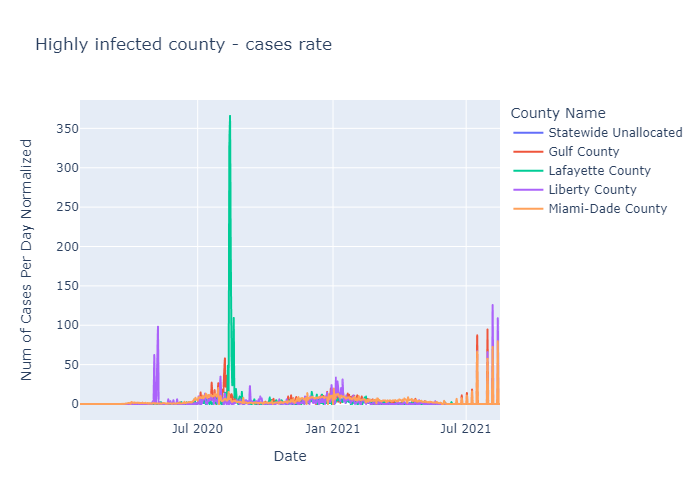

In [105]:
fig11_fl = px.line(high_case_df, x="Date", y="Num of Cases Per Day Normalized", color='County Name', title='Highly infected county - cases rate')
#fig11_fl.show()
fig11_fl.write_image("C:/Users/Vidya/Desktop/Data_Science_project/Fall-21_COVID-Team_5/Images/Saved Pictures/fig11_fl.png")
img_bytes = fig11_fl.to_image(format="png")
Image(img_bytes)

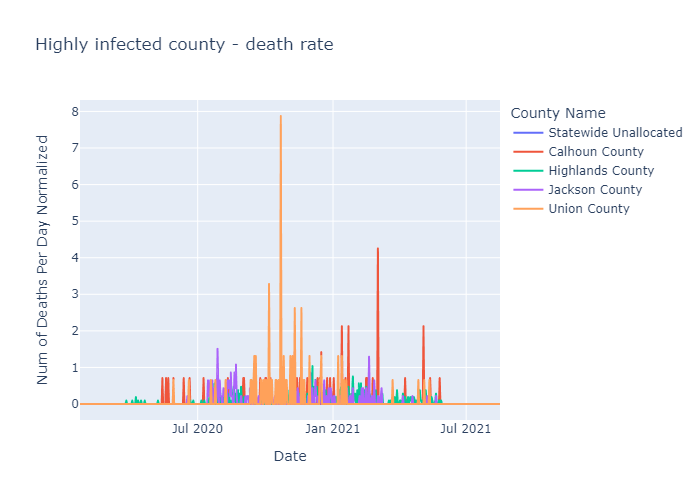

In [106]:
fig12_fl = px.line(high_death_df, x="Date", y="Num of Deaths Per Day Normalized", color='County Name', title='Highly infected county - death rate')
#fig12_fl.show()
fig12_fl.write_image("C:/Users/Vidya/Desktop/Data_Science_project/Fall-21_COVID-Team_5/Images/Saved Pictures/fig12_fl.png")
img_bytes = fig12_fl.to_image(format="png")
Image(img_bytes)

In [153]:
states_5

,State,Date,Num of Cases Per Day,Num of Deaths Per Day,Population,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
0,CA,2020-01-23,0.0,0.0,39512223,0.000000,0.000000
1,CA,2020-01-24,0.0,0.0,39512223,0.000000,0.000000
2,CA,2020-01-25,0.0,0.0,39512223,0.000000,0.000000
3,CA,2020-01-26,2.0,0.0,39512223,0.050617,0.000000
4,CA,2020-01-27,1.0,0.0,39512223,0.025309,0.000000
...,...,...,...,...,...,...,...
3427,TX,2021-08-12,15206.0,122.0,28995881,524.419313,4.207494
3428,TX,2021-08-13,13728.0,144.0,28995881,473.446556,4.966223
3429,TX,2021-08-14,26630.0,118.0,28995881,918.406307,4.069544
3430,TX,2021-08-15,5173.0,45.0,28995881,178.404650,1.551945


# Task 2 

## Fit a distribution to the number of COVID-19 new cases of a state of your choosing.

In [139]:
print("mean =",FL_state["Num of Cases Per Day Normalized"].mean())
print("variance =",FL_state["Num of Cases Per Day Normalized"].var())
print("skewness =",FL_state["Num of Cases Per Day Normalized"].skew())
print("kurtosis =",FL_state["Num of Cases Per Day Normalized"].kurt())

mean = 129.27572016460906
variance = 284608.382341938
skewness = 7.4725213822483045
kurtosis = 57.93985939146771


In [151]:
k = [*range(0,430,10)]

# Calculating the lambda value by taking mean of "Num of New Cases Normalized
lambda_ = FL_state["Num of Cases Per Day Normalized"].mean()
lambda_

129.27572016460906

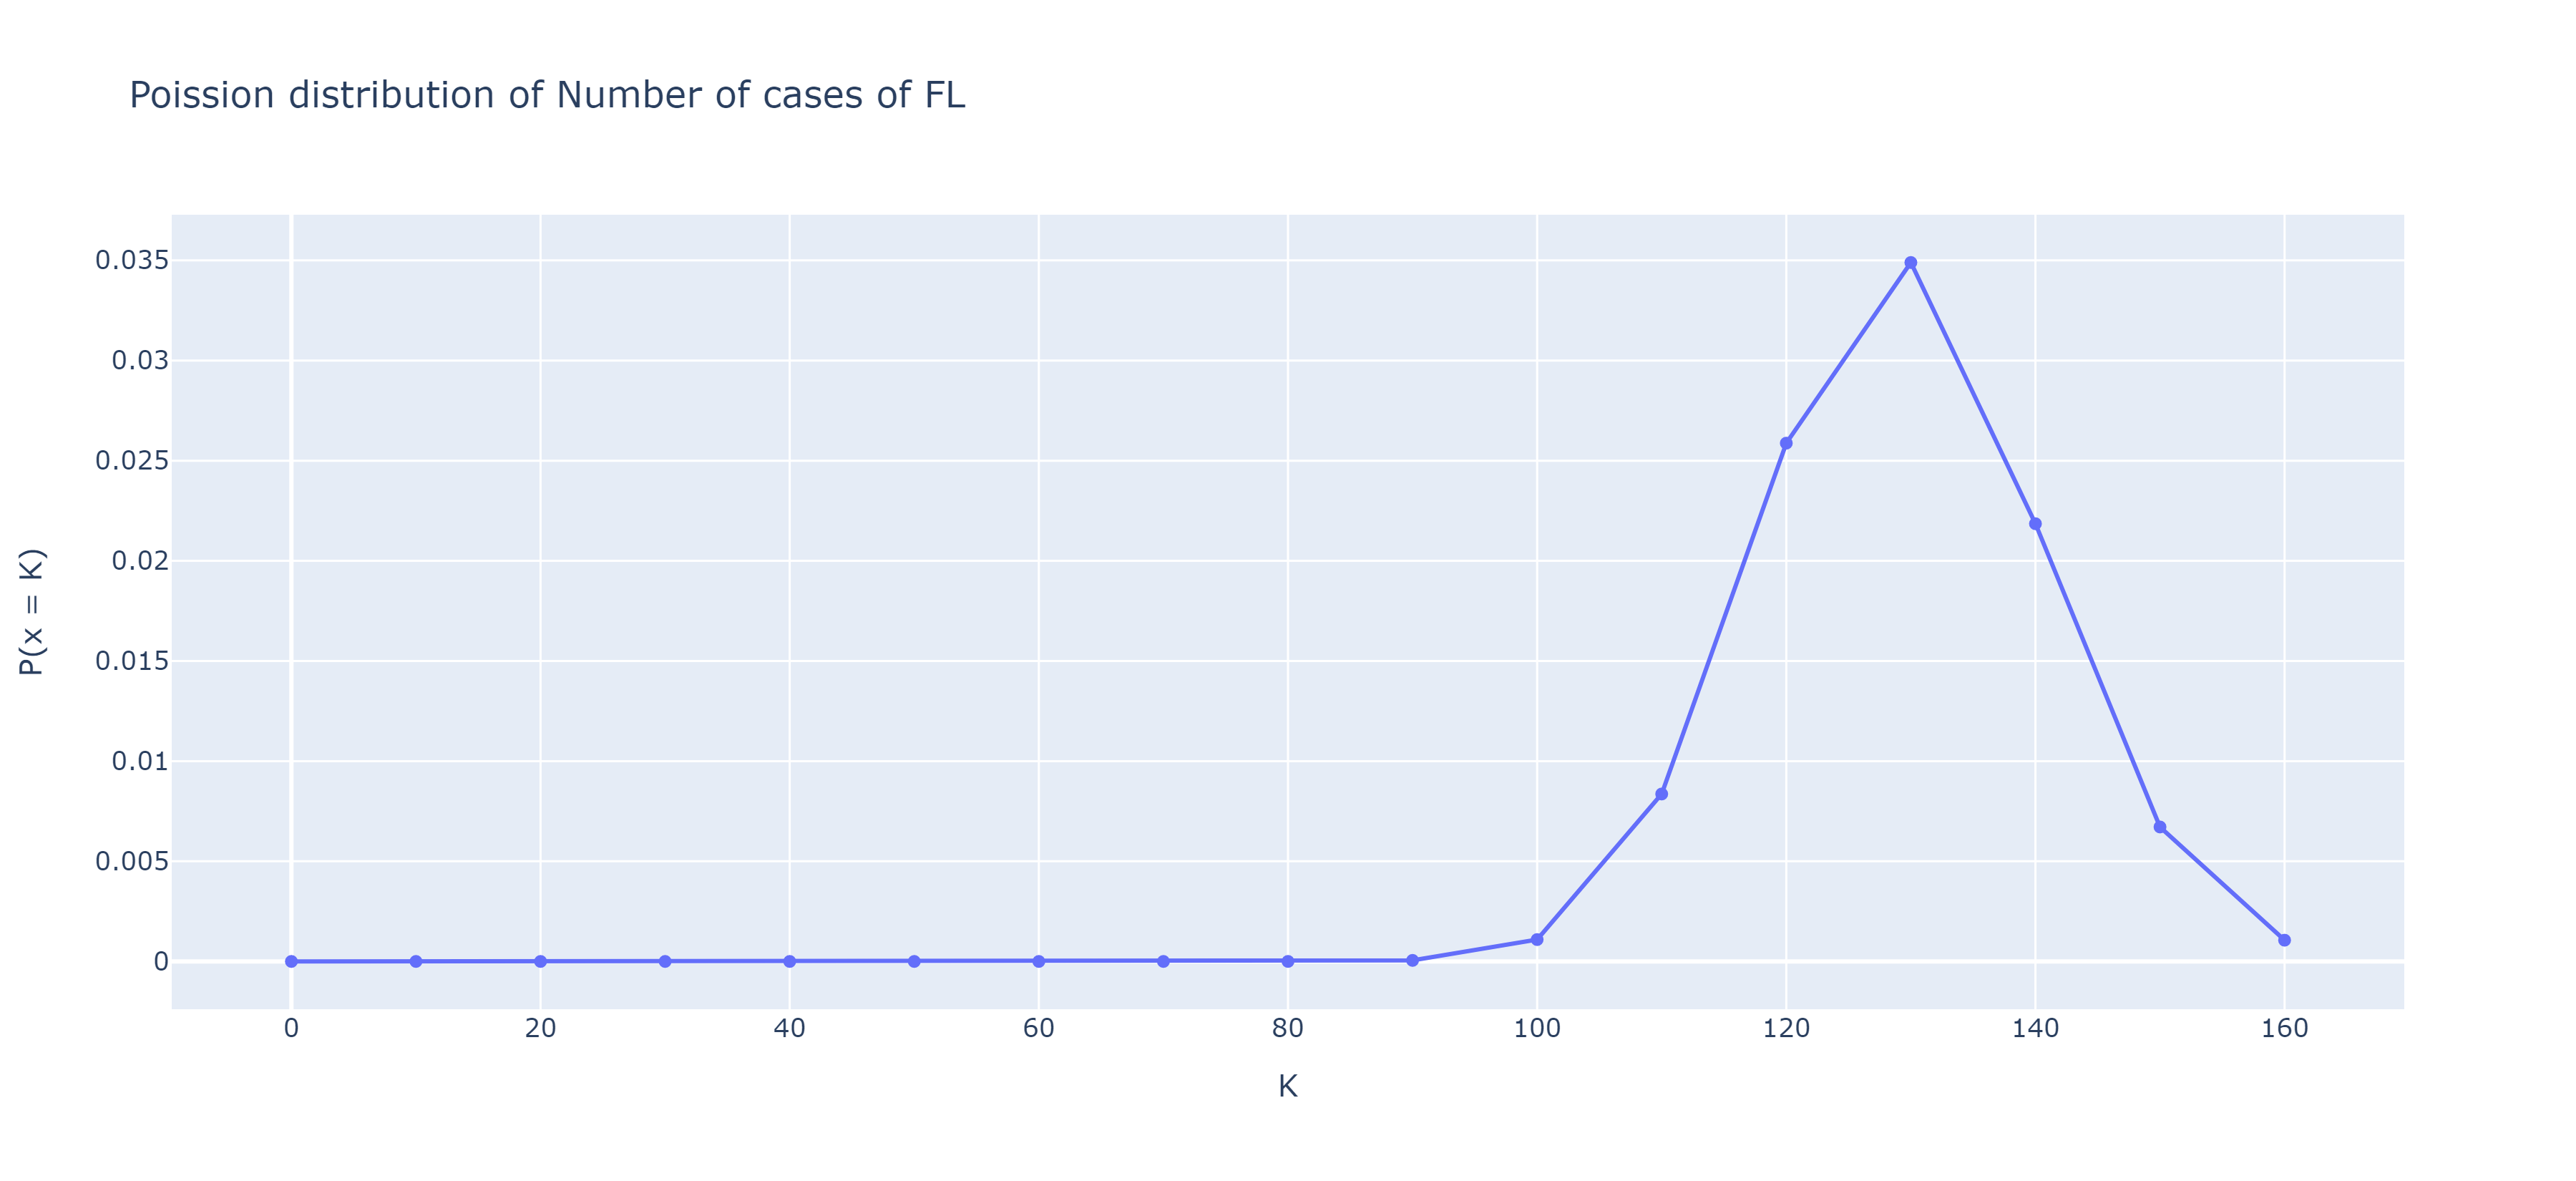

In [166]:
# Calculating OMF of poisson distribution
poisson_prob = poisson.pmf(k,lambda_)

fig = go.Figure()
fig = go.Figure(data=go.Scatter(x=k, y=poisson_prob))
fig.update_layout(
    title="Poission distribution of Number of cases of FL"
    ,xaxis_title="K"
    ,yaxis_title="P(x = K)"
    ,legend_title="Legend Title")
#fig.show()
fig.write_image("C:/Users/Vidya/Desktop/Data_Science_project/Fall-21_COVID-Team_5/Images/Saved Pictures/fig.png")
img_bytes = fig.to_image(format="png", width=1200, height=550, scale=3)
Image(img_bytes)

In [137]:
#get main dataframe
covid_data=pd.read_csv("C:/Users/Vidya/Desktop/Data_Science_project/Fall-21_COVID-Team_5/data/Stage_1/covid_large.csv")

#convert date from object to datetime
covid_data['Date'] = covid_data.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

#remove empty rows
covid_data = covid_data[covid_data.countyFIPS != 0]

#select only georgia rows
covid_data = covid_data[covid_data.State == 'FL']

#group rows by date
covid_data = covid_data.groupby(["Date"]).sum().reset_index()

#select only desired columns
covid_data = covid_data[['Date', 'Cases']]

#display dataset
covid_data

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
568,2021-08-12,2725448
569,2021-08-13,2877213
570,2021-08-14,2877213
571,2021-08-15,2877213


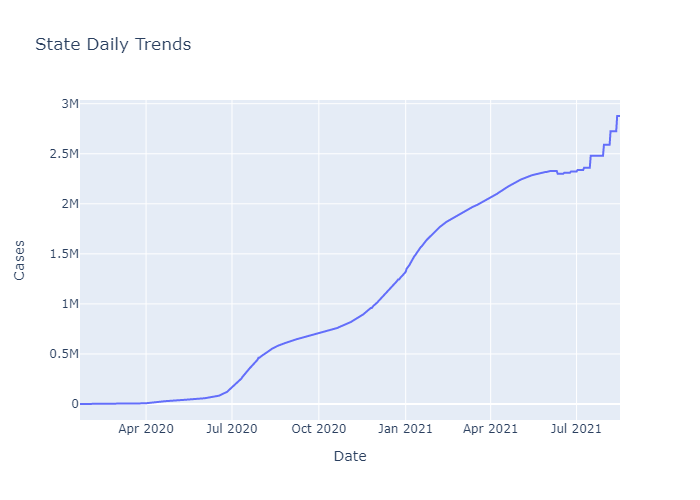

In [125]:
fig13 = px.line(covid_data, x = "Date", y = "Cases", title ='State Daily Trends ')

#display plot
#fig13.show()

fig13.write_image("C:/Users/Vidya/Desktop/Data_Science_project/Fall-21_COVID-Team_5/Images/Saved Pictures/fig13.png")
img_bytes = fig13.to_image(format="png")
Image(img_bytes)

(array([1.05541342e-06, 2.12295803e-07, 5.27706710e-07, 2.00164614e-07,
        1.39508671e-07, 1.51639859e-07, 3.03279719e-07, 4.00329229e-07,
        3.76066851e-07, 1.09180699e-07]),
 array([      0. ,  287721.3,  575442.6,  863163.9, 1150885.2, 1438606.5,
        1726327.8, 2014049.1, 2301770.4, 2589491.7, 2877213. ]),
 <BarContainer object of 10 artists>)

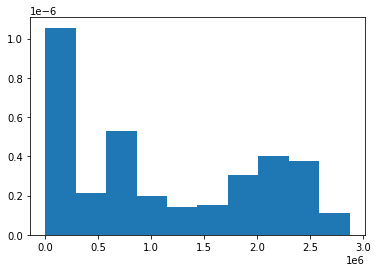

In [126]:
plt.hist(covid_data['Cases'], density = True)

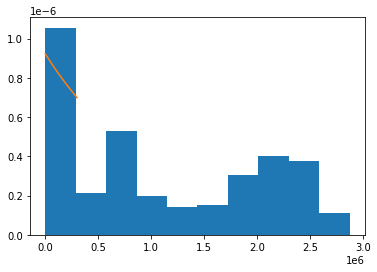

In [127]:
#fit the cases into exponential distribution
fitted_data = stats.expon.fit(covid_data['Cases'])

#obtain paramaters needed to make exponential distribution
a = np.linspace(0, 300000, 100)
b = stats.expon.pdf(a, *fitted_data)

#plot histogram
plt.hist(covid_data['Cases'], density = True)

#plot exponential distribution
plt.plot(a, b)

Compare the distribution and its statistics to 5 other states of your choosing.

In [131]:
covid_data2=pd.read_csv("C:/Users/Vidya/Desktop/Data_Science_project/Fall-21_COVID-Team_5/data/Stage_1/covid_large.csv")
covid_data2['Date'] = covid_data2.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

#remove empty rows
covid_data2 = covid_data2[covid_data2.countyFIPS != 0]

#select specific states and add to a list
stateList = ['FL','IL', 'PA', 'OH', 'MI', 'NJ']

#remove states that are not needed from the dataset
state_5 = covid_data2[covid_data2["State"].isin(["FL","TX","CA","NC","NY","IL"])]
state_5

#select only the columns that are needed from the dataset
state_5 = state_5[['State', 'Date', 'Cases', 'Death', 'Population']]

#group the dataset by state and date
#covid_data2 = covid_data2.groupby(["Date", "State"]).sum().reset_index().sort_values(["State", "Date"])

#display dataset
#covid_data2
state_5

,State,Date,Cases,Death,Population
109443,CA,2020-01-22,0,0,1671329
109444,CA,2020-01-23,0,0,1671329
109445,CA,2020-01-24,0,0,1671329
109446,CA,2020-01-25,0,0,1671329
109447,CA,2020-01-26,0,0,1671329
...,...,...,...,...,...
1616428,TX,2021-08-12,2010,43,11840
1616429,TX,2021-08-13,2025,43,11840
1616430,TX,2021-08-14,2041,43,11840
1616431,TX,2021-08-15,2041,43,11840


In [129]:
Groupedstates = state_5.groupby(["Date", "State"]).sum().reset_index().sort_values(["State", "Date"])

In [130]:
Groupedstates

,Date,State,Cases,Death,Population
0,2020-01-22,CA,0,0,39512223
6,2020-01-23,CA,0,0,39512223
12,2020-01-24,CA,0,0,39512223
18,2020-01-25,CA,0,0,39512223
24,2020-01-26,CA,2,0,39512223
...,...,...,...,...,...
3413,2021-08-12,TX,3278469,52768,28995881
3419,2021-08-13,TX,3292180,52912,28995881
3425,2021-08-14,TX,3318801,53029,28995881
3431,2021-08-15,TX,3323973,53072,28995881


In [132]:
Groupedstates['New Cases Per Day'] = Groupedstates['Cases'].diff()
Groupedstates['New Deaths Per Day'] = Groupedstates['Death'].diff()

#remove unneeded columns
#main = main[['Date', 'State', 'New Cases Per Day', 'New Deaths Per Day', 'population']]

#remove the rows that are NaN
#main = main[main.Date != '2020-01-22']

#display dataset
#main
Groupedstates

,Date,State,Cases,Death,Population,New Cases Per Day,New Deaths Per Day
0,2020-01-22,CA,0,0,39512223,NaN,NaN
6,2020-01-23,CA,0,0,39512223,0.0,0.0
12,2020-01-24,CA,0,0,39512223,0.0,0.0
18,2020-01-25,CA,0,0,39512223,0.0,0.0
24,2020-01-26,CA,2,0,39512223,2.0,0.0
...,...,...,...,...,...,...,...
3413,2021-08-12,TX,3278469,52768,28995881,15186.0,120.0
3419,2021-08-13,TX,3292180,52912,28995881,13711.0,144.0
3425,2021-08-14,TX,3318801,53029,28995881,26621.0,117.0
3431,2021-08-15,TX,3323973,53072,28995881,5172.0,43.0


In [133]:
Groupedstates = Groupedstates[Groupedstates['Date'] != '2020-01-22']
Groupedstates

,Date,State,Cases,Death,Population,New Cases Per Day,New Deaths Per Day
6,2020-01-23,CA,0,0,39512223,0.0,0.0
12,2020-01-24,CA,0,0,39512223,0.0,0.0
18,2020-01-25,CA,0,0,39512223,0.0,0.0
24,2020-01-26,CA,2,0,39512223,2.0,0.0
30,2020-01-27,CA,3,0,39512223,1.0,0.0
...,...,...,...,...,...,...,...
3413,2021-08-12,TX,3278469,52768,28995881,15186.0,120.0
3419,2021-08-13,TX,3292180,52912,28995881,13711.0,144.0
3425,2021-08-14,TX,3318801,53029,28995881,26621.0,117.0
3431,2021-08-15,TX,3323973,53072,28995881,5172.0,43.0


In [134]:
Groupedstates['New Cases Per Day Normalized']= (Groupedstates['New Cases Per Day']/Groupedstates['Population'])*100000
Groupedstates['New Deaths Per Day Normalized']= (Groupedstates['New Deaths Per Day']/Groupedstates['Population'])*100000

Groupedstates

,Date,State,Cases,Death,Population,New Cases Per Day,New Deaths Per Day,New Cases Per Day Normalized,New Deaths Per Day Normalized
6,2020-01-23,CA,0,0,39512223,0.0,0.0,0.000000,0.000000
12,2020-01-24,CA,0,0,39512223,0.0,0.0,0.000000,0.000000
18,2020-01-25,CA,0,0,39512223,0.0,0.0,0.000000,0.000000
24,2020-01-26,CA,2,0,39512223,2.0,0.0,0.005062,0.000000
30,2020-01-27,CA,3,0,39512223,1.0,0.0,0.002531,0.000000
...,...,...,...,...,...,...,...,...,...
3413,2021-08-12,TX,3278469,52768,28995881,15186.0,120.0,52.372956,0.413852
3419,2021-08-13,TX,3292180,52912,28995881,13711.0,144.0,47.286027,0.496622
3425,2021-08-14,TX,3318801,53029,28995881,26621.0,117.0,91.809592,0.403506
3431,2021-08-15,TX,3323973,53072,28995881,5172.0,43.0,17.837016,0.148297


In [141]:
Groupedstates = Groupedstates.groupby(['State'])['New Cases Per Day Normalized','New Deaths Per Day Normalized'].agg({'New Cases Per Day Normalized':'mean','New Deaths Per Day Normalized' :'mean'}).reset_index()

#display dataset
Groupedstates

,State,New Cases Per Day Normalized,New Deaths Per Day Normalized
0,CA,17.844664,0.283350
1,FL,23.420031,0.300954
2,IL,20.235707,0.360403
3,NC,18.709244,0.231365
4,NY,19.702075,0.479922
5,TX,20.076447,0.320042


Model a poission distribution of COVID-19 cases and deaths of a state and compare to other 5 states.

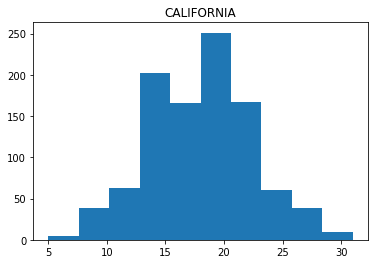

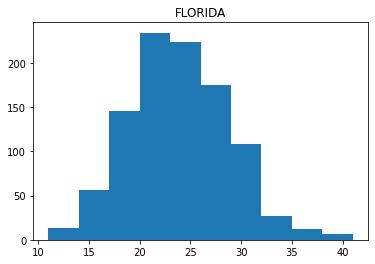

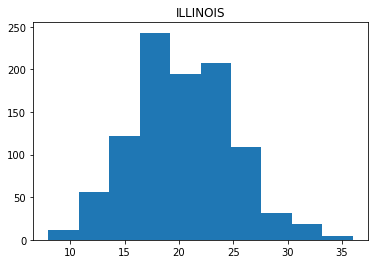

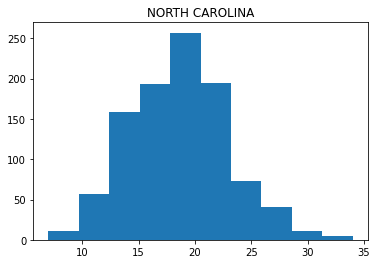

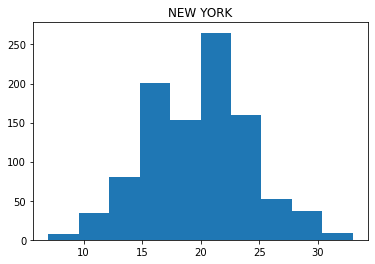

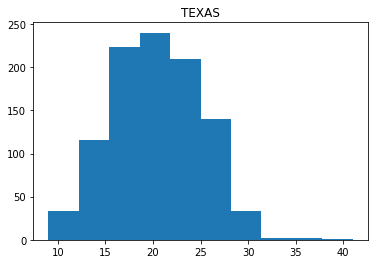

In [142]:
CA = stats.poisson.rvs(size = 1000, mu = 17.844664)
plt.hist(CA)
plt.title("CALIFORNIA") 
plt.show()

#display poisson model for illinois
FL = stats.poisson.rvs(size = 1000, mu = 23.420031)
plt.hist(FL)
plt.title("FLORIDA") 
plt.show()


#display poisson model for michigan
IL = stats.poisson.rvs(size = 1000, mu = 20.235707)
plt.hist(IL)
plt.title("ILLINOIS") 
plt.show()

#display poisson model for new jersey
NC = stats.poisson.rvs(size = 1000, mu = 18.709244)
plt.hist(NC)
plt.title("NORTH CAROLINA") 
plt.show()

#display poisson model for ohio
NY = stats.poisson.rvs(size = 1000, mu = 19.702075)
plt.hist(NY)
plt.title("NEW YORK") 
plt.show()

#display poisson model for pennsylvania
TX = stats.poisson.rvs(size = 1000, mu = 20.076447)
plt.hist(TX)
plt.title("TEXAS") 
plt.show()

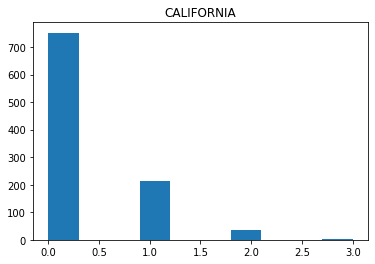

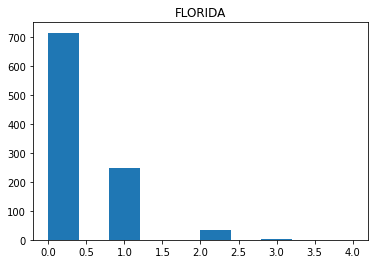

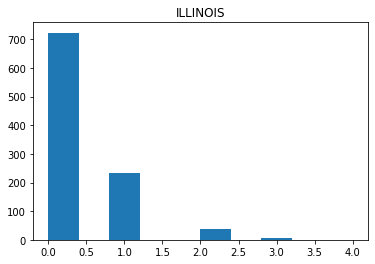

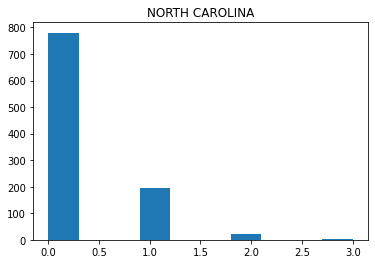

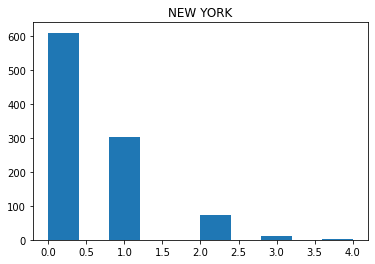

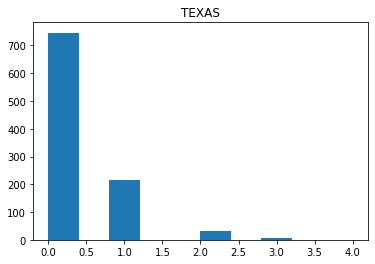

In [143]:
CA = stats.poisson.rvs(size = 1000, mu = 0.283350)
plt.hist(CA)
plt.title("CALIFORNIA") 
plt.show()

#display poisson model for illinois
FL = stats.poisson.rvs(size = 1000, mu = 0.300954)
plt.hist(FL)
plt.title("FLORIDA") 
plt.show()


#display poisson model for michigan
IL = stats.poisson.rvs(size = 1000, mu = 0.360403)
plt.hist(IL)
plt.title("ILLINOIS") 
plt.show()

#display poisson model for new jersey
NC = stats.poisson.rvs(size = 1000, mu = 0.231365)
plt.hist(NC)
plt.title("NORTH CAROLINA") 
plt.show()

#display poisson model for ohio
NY = stats.poisson.rvs(size = 1000, mu = 0.479922)
plt.hist(NY)
plt.title("NEW YORK") 
plt.show()

#display poisson model for pennsylvania
TX = stats.poisson.rvs(size = 1000, mu = 0.320042)
plt.hist(TX)
plt.title("TEXAS") 
plt.show()

Model poission distributions for North Carolina counties COVID-19 in cases and deaths.

In [144]:
covid_data3=pd.read_csv("C:/Users/Vidya/Desktop/Data_Science_project/Fall-21_COVID-Team_5/data/Stage_1/covid_large.csv")

In [145]:
covid_data3['Date'] = covid_data3.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

#remove empty rows
covid_data3 = covid_data3[covid_data3.countyFIPS != 0]

#select north carolina rows
NC_state = covid_data3[covid_data3.State == 'NC']

#select only needed columns and sort by County Name and Date
NC_state = NC_state[['County Name', 'Date', 'Cases', 'Death', 'Population']].sort_values(["County Name", "Date"], ascending = (True, True))

#display dataset
NC_state

,County Name,Date,Cases,Death,Population
1102452,Alamance County,2020-01-22,0,0,169509
1102453,Alamance County,2020-01-23,0,0,169509
1102454,Alamance County,2020-01-24,0,0,169509
1102455,Alamance County,2020-01-25,0,0,169509
1102456,Alamance County,2020-01-26,0,0,169509
...,...,...,...,...,...
1159747,Yancey County,2021-08-12,1864,28,18069
1159748,Yancey County,2021-08-13,1868,28,18069
1159749,Yancey County,2021-08-14,1868,28,18069
1159750,Yancey County,2021-08-15,1868,28,18069


In [146]:
NC_state['New Cases Per Day'] = NC_state['Cases'].diff()
NC_state['New Deaths Per Day'] = NC_state['Death'].diff()

#select only needed columns
NC_state= NC_state[['Date', 'County Name', 'New Cases Per Day', 'New Deaths Per Day', 'Population']]

#remove rows with NaN
NC_state = NC_state[NC_state.Date != '2020-01-22']

#display dataset
NC_state

,Date,County Name,New Cases Per Day,New Deaths Per Day,Population
1102453,2020-01-23,Alamance County,0.0,0.0,169509
1102454,2020-01-24,Alamance County,0.0,0.0,169509
1102455,2020-01-25,Alamance County,0.0,0.0,169509
1102456,2020-01-26,Alamance County,0.0,0.0,169509
1102457,2020-01-27,Alamance County,0.0,0.0,169509
...,...,...,...,...,...
1159747,2021-08-12,Yancey County,29.0,0.0,18069
1159748,2021-08-13,Yancey County,4.0,0.0,18069
1159749,2021-08-14,Yancey County,0.0,0.0,18069
1159750,2021-08-15,Yancey County,0.0,0.0,18069


In [147]:
NC_state['New Cases Per Day Normalized']= (NC_state['New Cases Per Day']/NC_state['Population'])*100000
NC_state['New Deaths Per Day Normalized']= (NC_state['New Deaths Per Day']/NC_state['Population'])*100000

#select specific columns
NC_state = NC_state[['Date', 'County Name', 'New Cases Per Day Normalized', 'New Deaths Per Day Normalized']]

#display dataset
NC_state

,Date,County Name,New Cases Per Day Normalized,New Deaths Per Day Normalized
1102453,2020-01-23,Alamance County,0.000000,0.0
1102454,2020-01-24,Alamance County,0.000000,0.0
1102455,2020-01-25,Alamance County,0.000000,0.0
1102456,2020-01-26,Alamance County,0.000000,0.0
1102457,2020-01-27,Alamance County,0.000000,0.0
...,...,...,...,...
1159747,2021-08-12,Yancey County,160.495877,0.0
1159748,2021-08-13,Yancey County,22.137362,0.0
1159749,2021-08-14,Yancey County,0.000000,0.0
1159750,2021-08-15,Yancey County,0.000000,0.0


In [148]:
NC_state = NC_state.groupby(['County Name'])['New Cases Per Day Normalized','New Deaths Per Day Normalized'].agg({'New Cases Per Day Normalized':'mean','New Deaths Per Day Normalized' :'mean'}).reset_index()

#display dataset
NC_state

,County Name,New Cases Per Day Normalized,New Deaths Per Day Normalized
0,Alamance County,21.019162,0.298064
1,Alexander County,22.701117,0.396302
2,Alleghany County,17.942460,0.078488
3,Anson County,20.360275,0.407635
4,Ashe County,15.783944,0.289201
...,...,...,...
95,Wayne County,17.735105,0.350698
96,Wilkes County,19.965928,0.304102
97,Wilson County,22.444884,0.397519
98,Yadkin County,21.076303,0.259915


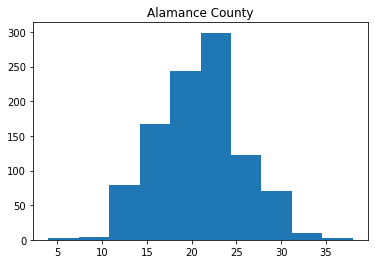

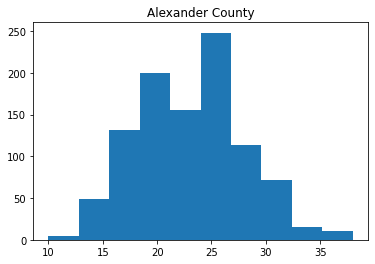

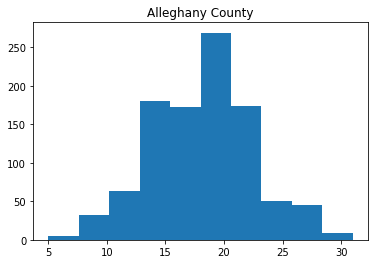

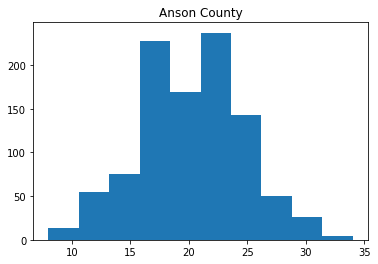

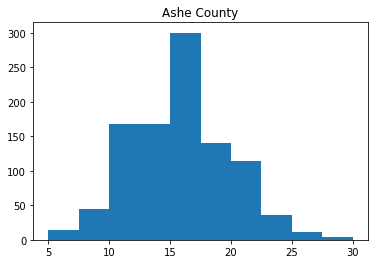

In [149]:
#display alamance county cases poisson model
alamanceCounty = stats.poisson.rvs(size = 1000, mu = 21.019162)
plt.hist(alamanceCounty)
plt.title("Alamance County") 
plt.show()

#display alexander county cases poisson model
alexanderCounty = stats.poisson.rvs(size = 1000, mu = 22.701117)
plt.hist(alexanderCounty)
plt.title("Alexander County") 
plt.show()

#display alleghany county cases poisson model
alleghanyCounty = stats.poisson.rvs(size = 1000, mu = 17.942460	)
plt.hist(alleghanyCounty)
plt.title("Alleghany County") 
plt.show()

#display anson county cases poisson model
ansonCounty = stats.poisson.rvs(size = 1000, mu = 20.360275)
plt.hist(ansonCounty)
plt.title("Anson County") 
plt.show()

#display ashe countycases poisson model
asheCounty = stats.poisson.rvs(size = 1000, mu = 15.783944)
plt.hist(asheCounty)
plt.title("Ashe County") 
plt.show()

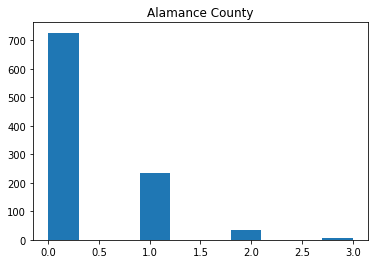

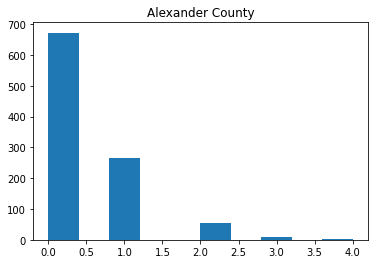

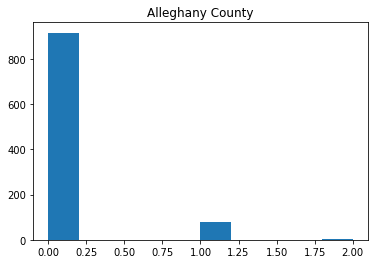

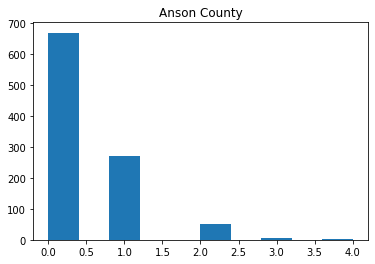

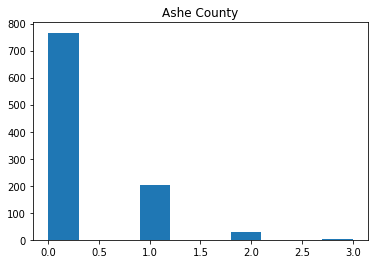

In [150]:
alamanceCounty = stats.poisson.rvs(size = 1000, mu = 0.298064)
plt.hist(alamanceCounty)
plt.title("Alamance County") 
plt.show()

#display alexander county deaths poisson model
alexanderCounty = stats.poisson.rvs(size = 1000, mu = 0.396302)
plt.hist(alexanderCounty)
plt.title("Alexander County") 
plt.show()

#display alleghany county deaths poisson model
alleghanyCounty = stats.poisson.rvs(size = 1000, mu = 0.078488)
plt.hist(alleghanyCounty)
plt.title("Alleghany County") 
plt.show()

#display anson county deaths poisson model
ansonCounty = stats.poisson.rvs(size = 1000, mu = 0.407635)
plt.hist(ansonCounty)
plt.title("Anson County") 
plt.show()

#display ashe county deaths poisson model
asheCounty = stats.poisson.rvs(size = 1000, mu = 0.289201)
plt.hist(asheCounty)
plt.title("Ashe County") 
plt.show()

### Perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns.

In [167]:
covid_data4=pd.read_csv("C:/Users/Vidya/Desktop/Data_Science_project/ABC/combined-csv-files.csv")
covid_data4

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population
0,0,Statewide Unallocated,AL,1,2020-01-22,0,0.0,0.0
1,0,Statewide Unallocated,AL,1,2020-01-23,0,0.0,0.0
2,0,Statewide Unallocated,AL,1,2020-01-24,0,0.0,0.0
3,0,Statewide Unallocated,AL,1,2020-01-25,0,0.0,0.0
4,0,Statewide Unallocated,AL,1,2020-01-26,0,0.0,0.0
...,...,...,...,...,...,...,...,...
1861763,Arizona,Mohave County,Donald Trump,REP,78535.0,True,NaN,NaN
1861764,Arizona,Mohave County,Joe Biden,DEM,24831.0,False,NaN,NaN
1861765,Arizona,Mohave County,Jo Jorgensen,LIB,1302.0,False,NaN,NaN
1861766,Arizona,Mohave County,Write-ins,WRI,37.0,False,NaN,NaN


In [168]:
covid_data4 = covid_data4[covid_data4['County Name'] != 'Statewide Unallocated']
covid_data4.head()

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population
573,1001,Autauga County,AL,1,2020-01-22,0,0.0,55869.0
574,1001,Autauga County,AL,1,2020-01-23,0,0.0,55869.0
575,1001,Autauga County,AL,1,2020-01-24,0,0.0,55869.0
576,1001,Autauga County,AL,1,2020-01-25,0,0.0,55869.0
577,1001,Autauga County,AL,1,2020-01-26,0,0.0,55869.0


In [169]:
covid_data4 = covid_data4.groupby(['State','countyFIPS','County Name','Population','Cases','Death']).sum().reset_index()
covid_data4.head()

,State,countyFIPS,County Name,Population,Cases,Death,StateFIPS,Date
0,AK,2013,Aleutians East Borough,3337.0,0,0.0,358,2020-01-222020-01-232020-01-242020-01-252020-0...
1,AK,2013,Aleutians East Borough,3337.0,1,0.0,28,2020-07-212020-07-222020-07-232020-07-242020-0...
2,AK,2013,Aleutians East Borough,3337.0,2,0.0,112,2020-07-182020-07-192020-08-042020-08-052020-0...
3,AK,2013,Aleutians East Borough,3337.0,3,0.0,12,2020-09-272020-09-282020-09-292020-09-302020-1...
4,AK,2013,Aleutians East Borough,3337.0,5,0.0,40,2020-10-032020-10-042020-10-052020-10-062020-1...


In [170]:
covid_data4 = covid_data4.drop(columns="Date")

In [172]:
covid_data4 = covid_data4.drop(columns="countyFIPS")
covid_data4 = covid_data4.drop(columns="StateFIPS")
covid_data4


,State,County Name,Population,Cases,Death
0,AK,Aleutians East Borough,3337.0,0,0.0
1,AK,Aleutians East Borough,3337.0,1,0.0
2,AK,Aleutians East Borough,3337.0,2,0.0
3,AK,Aleutians East Borough,3337.0,3,0.0
4,AK,Aleutians East Borough,3337.0,5,0.0
...,...,...,...,...,...
1009793,WY,Weston County,6927.0,8,0.0
1009794,WY,Weston County,6927.0,81,0.0
1009795,WY,Weston County,6927.0,88,0.0
1009796,WY,Weston County,6927.0,93,0.0


In [174]:
state = covid_data4.groupby(['State']).sum().reset_index()
state.head()

,State,Population,Death
0,AK,2.471854e+08,58466.0
1,AL,2.228998e+09,2329489.0
2,AR,1.278690e+09,1258648.0
3,AZ,3.423254e+09,4001261.0
4,CA,1.826972e+10,13434234.0


In [175]:
state.corr()

,Population,Death
Population,1.00000,0.87811
Death,0.87811,1.00000


Here we have done the correlation part.